#### Installing required packages

In [1]:
#Importing required libraries
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.gridspec as gridspec
# import matplotlib

# %matplotlib qt

# Importing data from csv generated from HPC data

In [2]:
# import all trasect files
folder_path = "/Users/gb4818/OneDrive - Imperial College London/Rev-res-in/dispersion/csv-files"
files = os.listdir(folder_path)
print(files)
# Filter files based a the pattern
relevant_files = [file for file in files if "w50_" in file and "_iterations_species_richness.csv" in file]

['w50_30dp_iterations_species_richness.csv', 'w50_20dp_grids_species_richness.csv', 'w50_15dp_iterations_species_richness.csv', 'w50_6dp_grids_genetic_diversity.csv', 'w50_35dp_grids_species_richness.csv', 'w50_3dp_grids_species_richness.csv', 'w50_30dp_genetic_diversity.csv', '.DS_Store', 'w50_6dp_genetic_diversity.csv', 'w50_50dp_grids_species_richness.csv', 'w50_50dp_iterations_species_richness.csv', 'w50_20dp_iterations_species_richness.csv', 'w50_8dp_grids_genetic_diversity.csv', 'w50_20dp_genetic_diversity.csv', 'w50_25dp_grids_species_richness.csv', 'w50_30dp_grids_species_richness.csv', 'w50_15dp_genetic_diversity.csv', 'w50_40dp_grids_species_richness.csv', 'w50_8dp_grids_species_richness.csv', 'w50_6dp_grids_species_richness.csv', 'w50_3dp_iterations_species_richness.csv', 'w50_40dp_iterations_species_richness.csv', 'w50_10dp_iterations_species_richness.csv', 'w50_35dp_iterations_species_richness.csv', 'w50_8dp_iterations_species_richness.csv', 'w50_3dp_grids_genetic_diversit

Importing all the csv and storing them in a dictionary:

In [3]:
# Import relevant files and store them as grid_dp
dfs = {} # create a disctionary to store my data
for file in relevant_files:
    # Extract dp from the file name
    dp = file.split("_")[1]

    # Read the CSV file into a DataFrame
    df = pd.read_csv(os.path.join(folder_path, file)) #.query('Iteration_Number == 99999')

    # Store the DataFrame with the name grid_dp
    dfs[dp] = df

    print(f"File '{file}' imported as '{dp}'")
    print(f'Table for {dp}: \n', df.head())
 


File 'w50_30dp_iterations_species_richness.csv' imported as '30dp'
Table for 30dp: 
    Iteration_Number  Species_Count                          Simulation  dp
0                 0              1  REvoSim_log_envw50_30dp_aj1283.txt  30
1                49              1  REvoSim_log_envw50_30dp_aj1283.txt  30
2                99              1  REvoSim_log_envw50_30dp_aj1283.txt  30
3               149              1  REvoSim_log_envw50_30dp_aj1283.txt  30
4               199              1  REvoSim_log_envw50_30dp_aj1283.txt  30
File 'w50_15dp_iterations_species_richness.csv' imported as '15dp'
Table for 15dp: 
    Unnamed: 0  Iteration_Number  Species_Count  \
0        2001                 0              1   
1        2002                49              1   
2        2003                99              1   
3        2004               149              1   
4        2005               199              1   

                           Simulation  dp  
0  REvoSim_log_envw50_15dp_aj1323.t

In [4]:
print (list(dfs.keys()))
# Create a new dictionary with integer keys so that I can better plot
dfs_int_keys = {}
# Convert keys to integers and add them to the new dictionary
for dp, df in dfs.items():
    # Extract the integer part from the key
    dp_int = int(dp[:-2])  # Remove the last two characters ('dp') and convert to integer
    # Add the DataFrame to the new dictionary with the integer key
    dfs_int_keys[dp_int] = df

# Print the new dictionary keys
print(list(dfs_int_keys.keys()))

['30dp', '15dp', '50dp', '20dp', '3dp', '40dp', '10dp', '35dp', '8dp', '4dp', '25dp', '6dp']
[30, 15, 50, 20, 3, 40, 10, 35, 8, 4, 25, 6]


In [ ]:
plt.figure(figsize=(10, 7))

# Get the accent palette colors
palette = sns.color_palette("Accent", len(dfs_int_keys))

# Iterate over both the DataFrame items and the palette colors
for index, ((dp, df), color) in enumerate(zip(dfs_int_keys.items(), palette)):
    sns.lineplot(data=df, x='Iteration_Number', y='Species_Count', color=color, label=dp)

plt.xlabel("Iteration")
plt.ylabel("Species Richness")
plt.legend(title='dp')
plt.show()

Counting Numbers of Simulations for each dp

In [5]:
# Looping over the DataFrames in the Dictionary
for dp, df in sorted(dfs_int_keys.items()):
    N = len(df['Simulation'].unique())
    print('for d =', dp, 'there are', N, "simulations")

for d = 3 there are 3000 simulations
for d = 4 there are 3000 simulations
for d = 6 there are 3000 simulations
for d = 8 there are 3000 simulations
for d = 10 there are 3000 simulations
for d = 15 there are 3000 simulations
for d = 20 there are 3000 simulations
for d = 25 there are 3000 simulations
for d = 30 there are 3000 simulations
for d = 35 there are 3000 simulations
for d = 40 there are 3000 simulations
for d = 50 there are 3000 simulations


Counting how many simulations ended at $T = 100,000$

In [6]:
# List to hold the results
complete_sims = []
# Looping over the DataFrames in the Dictionary
for dp, df in sorted(dfs_int_keys.items()):
    N = len(df[df['Iteration_Number']== 99999])
    N_all = len(df['Simulation'].unique())
    print('for d = ', dp, 'there are ', N, " Simulations terminating at T = 100,000")
    complete_sims.append((dp, N, N_all))
complete_sims_df = pd.DataFrame(complete_sims, columns=['d', 'N', 'N_all'])


for d =  3 there are  2769  Simulations terminating at T = 100,000
for d =  4 there are  2846  Simulations terminating at T = 100,000
for d =  6 there are  2878  Simulations terminating at T = 100,000
for d =  8 there are  2891  Simulations terminating at T = 100,000
for d =  10 there are  2900  Simulations terminating at T = 100,000
for d =  15 there are  2871  Simulations terminating at T = 100,000
for d =  20 there are  2896  Simulations terminating at T = 100,000
for d =  25 there are  2855  Simulations terminating at T = 100,000
for d =  30 there are  2897  Simulations terminating at T = 100,000
for d =  35 there are  2879  Simulations terminating at T = 100,000
for d =  40 there are  2886  Simulations terminating at T = 100,000
for d =  50 there are  2892  Simulations terminating at T = 100,000


In [150]:

print("Here it is a table summarising the sample size of complete simulations for each dp:")
complete_sims_df


Here it is a table summarising the sample size of complete simulations for each dp:


,d,N,N_all
0,3,2769,3000
1,4,2846,3000
2,6,2878,3000
3,8,2891,3000
4,10,2900,3000
5,15,2871,3000
6,20,2896,3000
7,25,2855,3000
8,30,2897,3000
9,35,2879,3000


Percentage of missing data at equilibrium:

In [105]:
# Creating new cols for better understanding of the data
complete_sims_df['Missing N']=complete_sims_df['N_all']-complete_sims_df['N']
complete_sims_df['Percentage Missing']=complete_sims_df['Missing N']/complete_sims_df['N_all']*100

# Making sure the percentage is formatted correctly
complete_sims_df['Percentage Missing'] = complete_sims_df['Percentage Missing'].apply(lambda x: f"{x:.2f}")
complete_sims_df


,d,N,N_all,Missing N,Percentage Missing
0,3,2769,3000,231,7.70
1,4,2846,3000,154,5.13
2,6,2878,3000,122,4.07
3,8,2891,3000,109,3.63
4,10,2900,3000,100,3.33
5,15,2871,3000,129,4.30
6,20,2896,3000,104,3.47
7,25,2855,3000,145,4.83
8,30,2897,3000,103,3.43
9,35,2879,3000,121,4.03


In [106]:
# oredering by the percentage missing
complete_sims_df = complete_sims_df.sort_values(by='Percentage Missing', ascending=False)
print(complete_sims_df)

     d     N  N_all  Missing N Percentage Missing
0    3  2769   3000        231               7.70
1    4  2846   3000        154               5.13
7   25  2855   3000        145               4.83
5   15  2871   3000        129               4.30
2    6  2878   3000        122               4.07
9   35  2879   3000        121               4.03
10  40  2886   3000        114               3.80
3    8  2891   3000        109               3.63
11  50  2892   3000        108               3.60
6   20  2896   3000        104               3.47
8   30  2897   3000        103               3.43
4   10  2900   3000        100               3.33


I'm interested in understanding at which T the simulations terminated. So I'm going to do some investigations. 

In [95]:
# List to hold the results
shorter_sims = []
# Looping over the DataFrames in the Dictionary
for dp, df in sorted(dfs_int_keys.items()):
    maxes = df.groupby('Simulation')['Iteration_Number'].max()
    filtered_maxes = maxes[maxes!= 99999]

# Append the results to the list
    for simulation, iteration_number in filtered_maxes.items():
        shorter_sims.append({'d': dp, 'Simulation': simulation, 'Iteration_Number': iteration_number})

# Convert the list to a DataFrame
shorter_sims_df = pd.DataFrame(shorter_sims)

# Print the resulting DataFrame
print(shorter_sims_df)


       d                         Simulation  Iteration_Number
0      3  REvoSim_log_envw50_3dp_aj1013.txt                 0
1      3  REvoSim_log_envw50_3dp_aj1052.txt                 0
2      3  REvoSim_log_envw50_3dp_aj1058.txt                 0
3      3  REvoSim_log_envw50_3dp_aj1070.txt                 0
4      3  REvoSim_log_envw50_3dp_aj1084.txt                 0
...   ..                                ...               ...
1535  50  REvoSim_log_envw50_50dp_aj916.txt                 0
1536  50  REvoSim_log_envw50_50dp_aj935.txt                 0
1537  50  REvoSim_log_envw50_50dp_aj958.txt                 0
1538  50  REvoSim_log_envw50_50dp_aj977.txt                 0
1539  50  REvoSim_log_envw50_50dp_aj990.txt                 0

[1540 rows x 3 columns]


I will visualise this result to see how many truncated and where

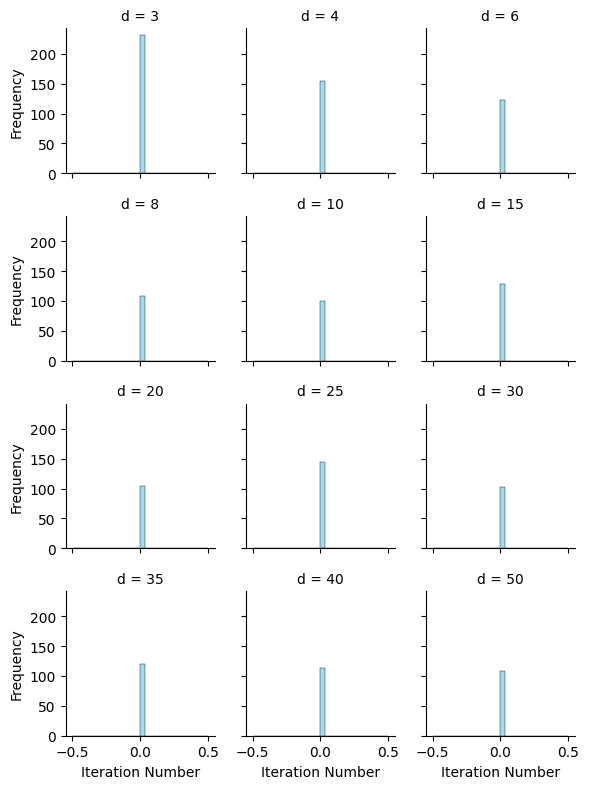

In [107]:
# Create a FacetGrid to plot histograms for different dp
g = sns.FacetGrid(shorter_sims_df, col='d', col_wrap=3, height=2, sharex=True, sharey=True)

# Map the histogram plot onto each facet
g.map(sns.histplot, 'Iteration_Number', bins=30, color='skyblue')

# Set labels and titles
g.set_axis_labels('Iteration Number', 'Frequency')
g.set_titles(col_template='d = {col_name}')
plt.show()

/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_6938/1543744345.py:12: UserWarning: 
The palette list has fewer values (1) than needed (3000) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df, x='Iteration_Number', y='Species_Count', ax = ax_main,  hue='Simulation', palette=palette, legend=False, alpha = 0.1, linewidth = 0.5)


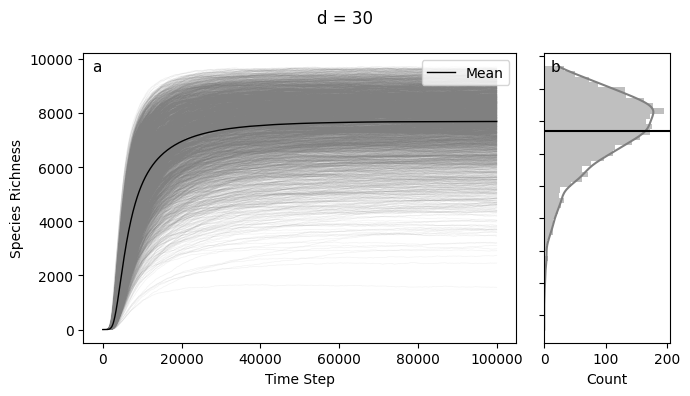

/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_6938/1543744345.py:12: UserWarning: 
The palette list has fewer values (1) than needed (3000) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df, x='Iteration_Number', y='Species_Count', ax = ax_main,  hue='Simulation', palette=palette, legend=False, alpha = 0.1, linewidth = 0.5)


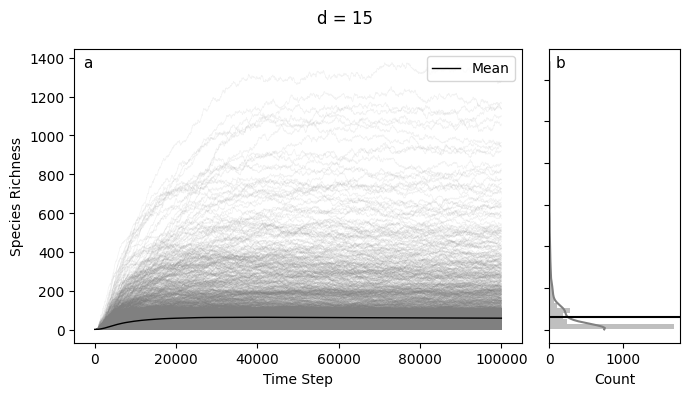

/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_6938/1543744345.py:12: UserWarning: 
The palette list has fewer values (1) than needed (3000) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df, x='Iteration_Number', y='Species_Count', ax = ax_main,  hue='Simulation', palette=palette, legend=False, alpha = 0.1, linewidth = 0.5)


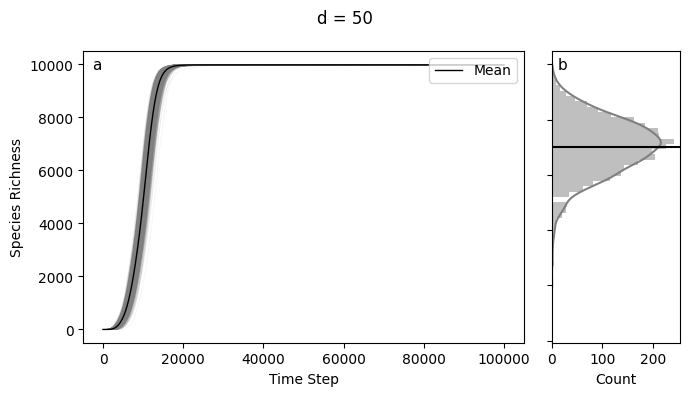

/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_6938/1543744345.py:12: UserWarning: 
The palette list has fewer values (1) than needed (3000) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df, x='Iteration_Number', y='Species_Count', ax = ax_main,  hue='Simulation', palette=palette, legend=False, alpha = 0.1, linewidth = 0.5)


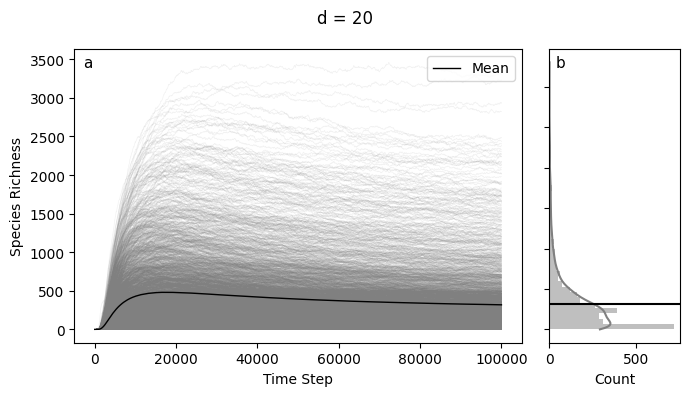

/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_6938/1543744345.py:12: UserWarning: 
The palette list has fewer values (1) than needed (3000) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df, x='Iteration_Number', y='Species_Count', ax = ax_main,  hue='Simulation', palette=palette, legend=False, alpha = 0.1, linewidth = 0.5)


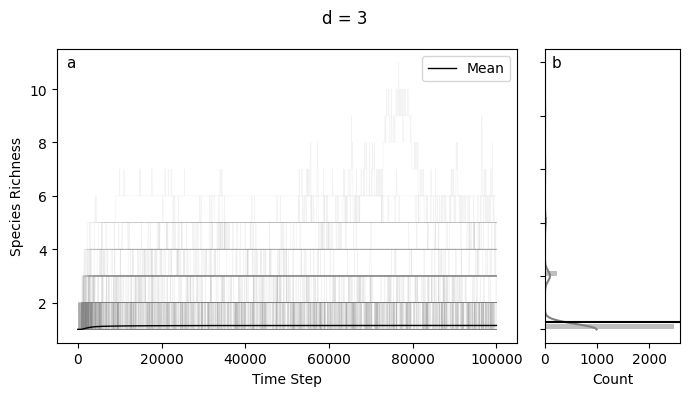

/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_6938/1543744345.py:12: UserWarning: 
The palette list has fewer values (1) than needed (3000) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df, x='Iteration_Number', y='Species_Count', ax = ax_main,  hue='Simulation', palette=palette, legend=False, alpha = 0.1, linewidth = 0.5)


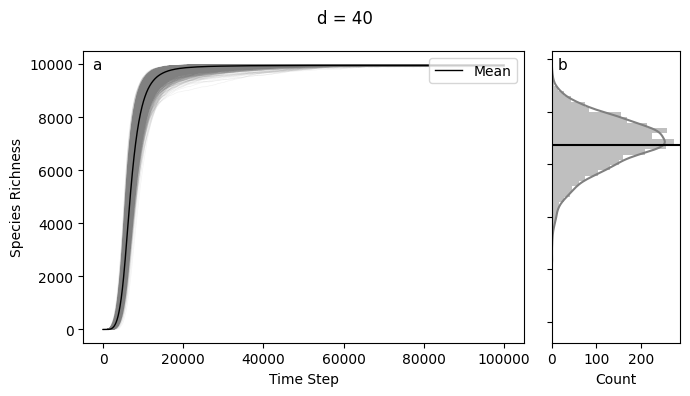

/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_6938/1543744345.py:12: UserWarning: 
The palette list has fewer values (1) than needed (3000) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df, x='Iteration_Number', y='Species_Count', ax = ax_main,  hue='Simulation', palette=palette, legend=False, alpha = 0.1, linewidth = 0.5)


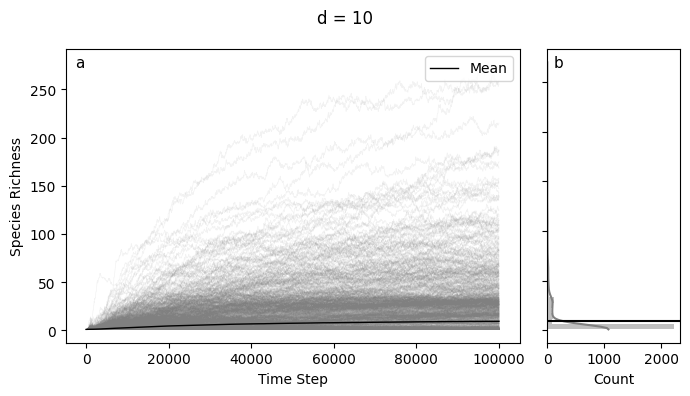

/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_6938/1543744345.py:12: UserWarning: 
The palette list has fewer values (1) than needed (3000) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df, x='Iteration_Number', y='Species_Count', ax = ax_main,  hue='Simulation', palette=palette, legend=False, alpha = 0.1, linewidth = 0.5)


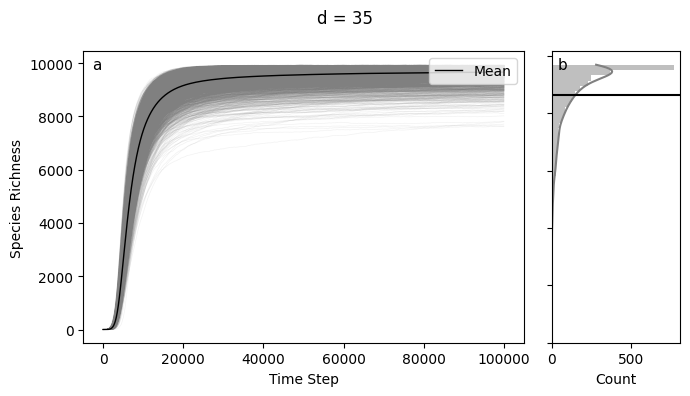

/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_6938/1543744345.py:12: UserWarning: 
The palette list has fewer values (1) than needed (3000) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df, x='Iteration_Number', y='Species_Count', ax = ax_main,  hue='Simulation', palette=palette, legend=False, alpha = 0.1, linewidth = 0.5)


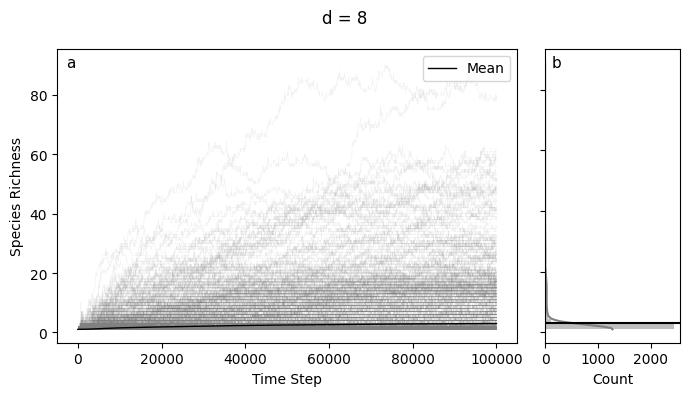

/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_6938/1543744345.py:12: UserWarning: 
The palette list has fewer values (1) than needed (3000) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df, x='Iteration_Number', y='Species_Count', ax = ax_main,  hue='Simulation', palette=palette, legend=False, alpha = 0.1, linewidth = 0.5)


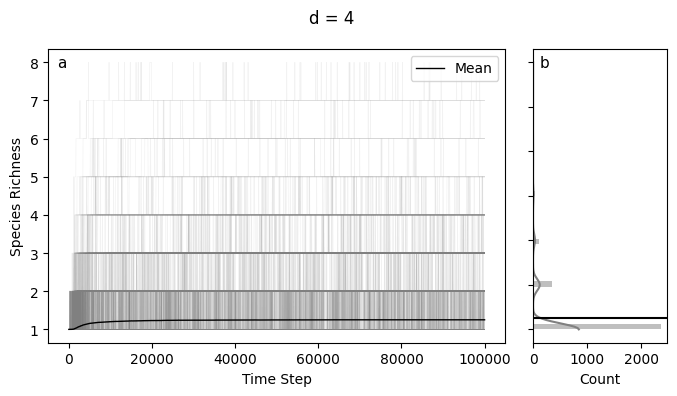

/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_6938/1543744345.py:12: UserWarning: 
The palette list has fewer values (1) than needed (3000) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df, x='Iteration_Number', y='Species_Count', ax = ax_main,  hue='Simulation', palette=palette, legend=False, alpha = 0.1, linewidth = 0.5)


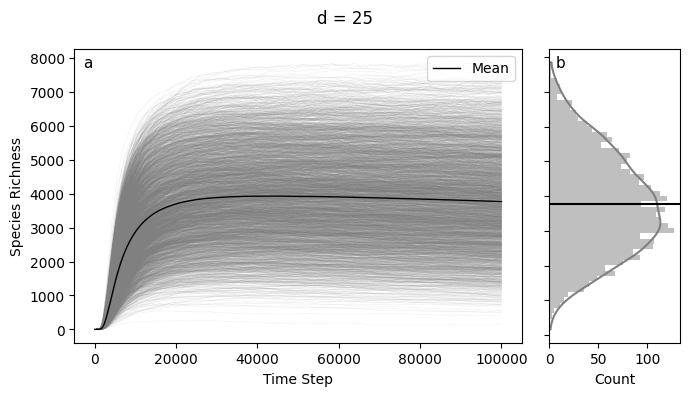

/var/folders/dm/ryjvp3j51h78gsbgf92k6xvh0000gp/T/ipykernel_6938/1543744345.py:12: UserWarning: 
The palette list has fewer values (1) than needed (3000) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df, x='Iteration_Number', y='Species_Count', ax = ax_main,  hue='Simulation', palette=palette, legend=False, alpha = 0.1, linewidth = 0.5)


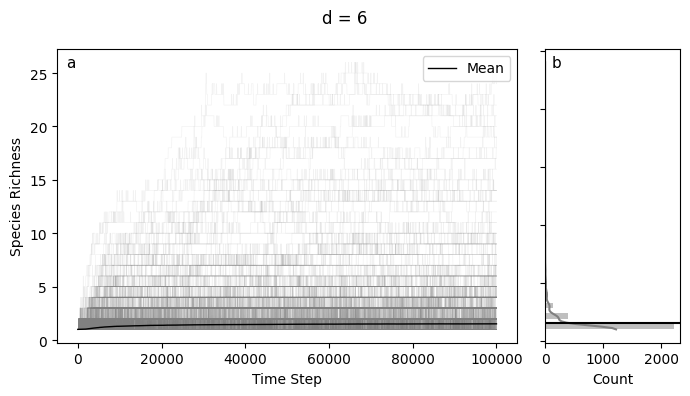

In [108]:
palette = ['gray']

for dp, df in dfs_int_keys.items():
    fig = plt.figure(figsize=(7, 4))
    fig.suptitle(f"d = {dp}", fontsize=12)
    plt.subplots_adjust(top=0.3)
    #greting a grid for the two plots
    gs = gridspec.GridSpec(3, 4)
    ax_main = plt.subplot(gs[:, :3])  # Adjusted the column index
    ax_yDist = ax_yDist = plt.subplot(gs[:, 3])
    
    sns.lineplot(data=df, x='Iteration_Number', y='Species_Count', ax = ax_main,  hue='Simulation', palette=palette, legend=False, alpha = 0.1, linewidth = 0.5)
    # Calculate mean and median for each iteration
    mean_values = df.groupby('Iteration_Number')['Species_Count'].mean()
    #meadian_value = data.groupby('Iteration_Number')['Species_Count'].median()
    # Plot mean line
    ax_main.plot(mean_values.index, mean_values.values,  color='Black', linewidth = 1 , label='Mean')
    #ax_main.plot(meadian_value.index, meadian_value.values,  color=colors[i], linestyle='-', label='Median')

    # Plot distribution at equilibrium
    data_hist = df[df['Iteration_Number'] == 99999]
    sns.histplot(data = data_hist, y = 'Species_Count', bins=50, ax=ax_yDist, color='gray', kde=True, edgecolor = 'none' ) 
    # Calculate and plot mean line on histogram plot
    mean_hist = data_hist['Species_Count'].mean()
    ax_yDist.axhline(y=mean_hist, color='black', linewidth=1.5, label='Mean')
    
    
    #annotate a and b on the two panels
    ax_main.annotate('a', xy=(0.02, 0.98), xycoords='axes fraction', fontsize=11,
                horizontalalignment='left', verticalalignment='top')
    ax_yDist.annotate('b', xy=(0.05, 0.98), xycoords='axes fraction', fontsize=11,
                horizontalalignment='left', verticalalignment='top')
    # Set title and axis
    #ax_main.set_title(f"d = {environment}")
    ax_main.set_xlabel("Time Step")
    ax_main.set_ylabel("Species Richness")

    # Remove labels of numbers on the y-axis ans set labels
    ax_yDist.set_yticklabels([])
    ax_yDist.set_xlabel("Count")
    ax_yDist.set(ylabel=None)
    
    # Reduce the space between subplots
    plt.subplots_adjust(wspace=0.0)  
    
    # Show legend
    ax_main.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

Something werid is happening at d =20, I'm going to investigate further

REvoSim_log_envw50_20dp_aj30_bis.txt is weird so I removed it, and I need to remove it from the other datasets too.

In [49]:
# # isolate d=20 df
# df_20 = dfs_int_keys[20]
# # REvoSim_log_envw50_20dp_aj30_bis.txt is responsible for the weird behaviour. I will remove it 
# df_20 = df_20[df_20['Simulation'] != 'REvoSim_log_envw50_20dp_aj30_bis.txt']
# df_20.to_csv('/Users/gb4818/OneDrive - Imperial College London/Rev-res-in/dispersion/csv-files/w50_20dp_iterations_species_richness.csv')


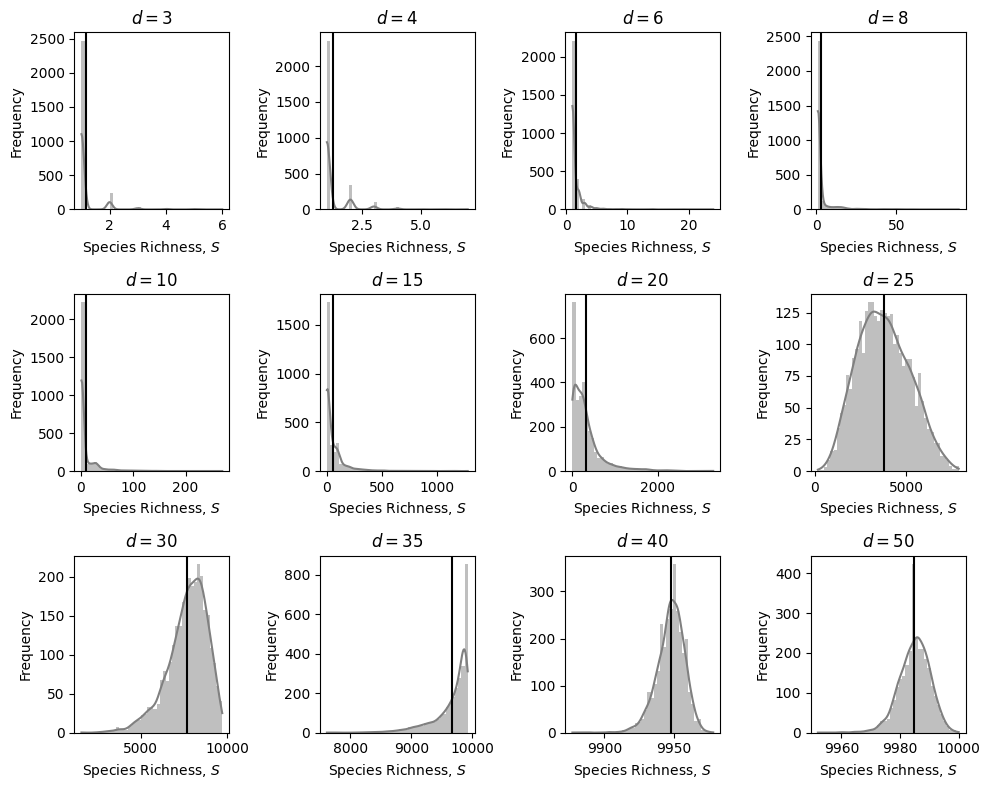

In [109]:
# Define the number of rows and columns for the subplot grid
num_rows = 3  # You can adjust these values based on your preference
num_cols = 4

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 8))

# Flatten the axes array if necessary
if num_rows == 1 and num_cols == 1:
    axes = [axes]

# Set the palette
palette = ['gray']

# Iterate over each (dp, df) pair and plot on subplots
for (dp, df), ax in zip(sorted(dfs_int_keys.items()), axes.flatten()):
    # Plot distribution at equilibrium
    data_hist = df[df['Iteration_Number'] == 99999]
    sns.histplot(data=data_hist, x='Species_Count', bins=45, color='gray', kde=True, edgecolor='none', ax=ax)
    
    # Calculate and plot mean line on histogram plot
    mean_hist = data_hist['Species_Count'].mean()
    ax.axvline(x=mean_hist, color='black', linewidth=1.5, label='Mean')
    # ax.set_xlim(left=0)
    
    ax.set_xlabel("Species Richness, $S$")
    ax.set_ylabel("Frequency")
    ax.set_title(f'$d = {dp}$')

# Adjust layout
plt.tight_layout()
plt.show()


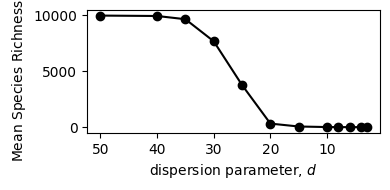

In [16]:
# Initialize lists to store keys and corresponding mean values
keys = []
mean_values = []

# Iterate over the dictionary to compute mean_hist for each key
for dp, df in sorted(dfs_int_keys.items()):
    # Filter data for the final iteration
    data_hist = df[df['Iteration_Number'] == 99999]
    mean_hist = data_hist['Species_Count'].mean()
    
    # Store the key and mean value
    keys.append(dp)
    mean_values.append(mean_hist)

# Create a new plot for the mean values
plt.figure(figsize=(4, 2))
plt.plot(keys, mean_values, marker='o', color='black', label='Mean Species Richness')
plt.xlabel("dispersion parameter, $d$")
plt.ylabel("Mean Species Richness, $S$")
# Invert the x-axis
plt.gca().invert_xaxis()

plt.tight_layout()
plt.show()


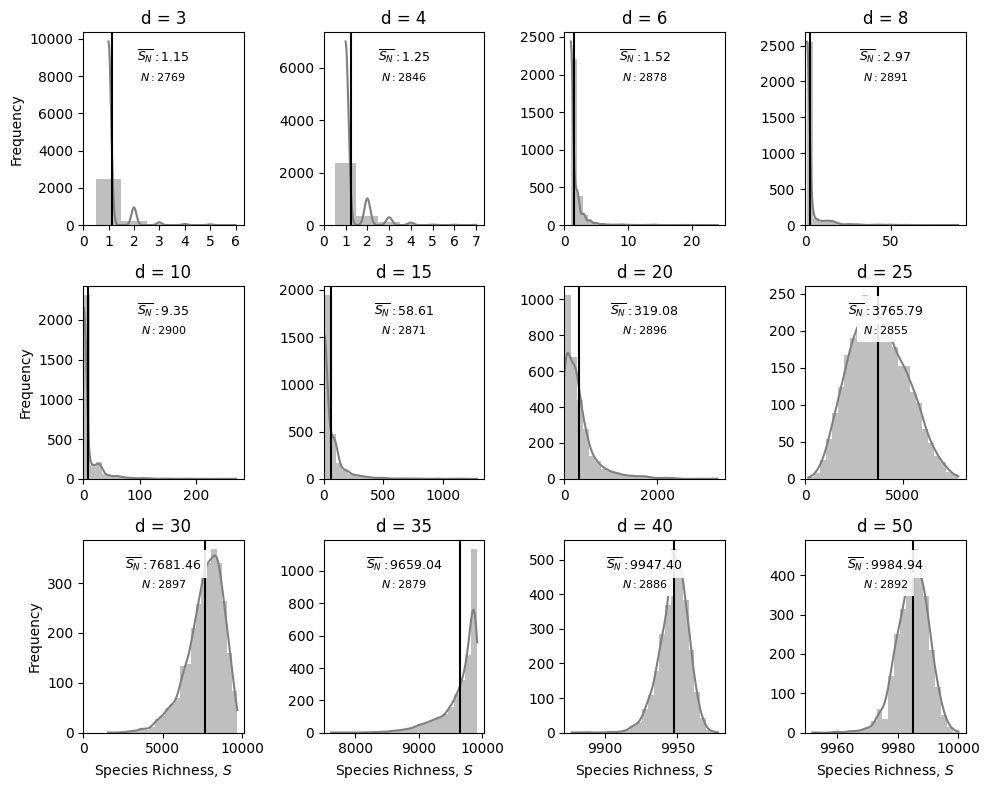

In [112]:
from matplotlib.ticker import MaxNLocator

# Define the number of rows and columns for the subplot grid
num_rows = 3  # You can adjust these values based on your preference
num_cols = 4

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 8))

# Flatten the axes array if necessary
axes = axes.flatten()

# Set the palette
palette = ['gray']

# Determine the indices of the last three plots
last_three_indices = [9, 10, 11]

# Iterate over each (dp, df) pair and plot on subplots
for idx, ((dp, df), ax) in enumerate(zip(sorted(dfs_int_keys.items()), axes)):
    # Plot distribution at equilibrium
    data_hist = df[df['Iteration_Number'] == 99999]
    
    # Set bins conditionally
    if idx == 0 or idx == 1:
        bins=np.arange(6)-0.5
    else:
        bins = 25
        
    sns.histplot(data=data_hist, x='Species_Count', bins=bins, color='gray', kde=True, edgecolor='none', ax=ax)
    
    # Calculate and plot mean line on histogram plot
    mean_hist = data_hist['Species_Count'].mean()
    ax.axvline(x=mean_hist, color='black', linewidth=1.5, label='Mean')
    num_N = len(data_hist)
    # Add text with the mean value
    ax.text(0.5, 0.85,transform=ax.transAxes, s=f'${{\\overline{{S_N}}}}: {mean_hist:.2f}$', color='black', ha='center', size=9, bbox=dict(facecolor='white', alpha = 0.9 , edgecolor='none'))
    # add text with number of simulations that reached equilibrium
    ax.text(0.5, 0.75,transform=ax.transAxes, s=f'$N: {num_N}$', color='black', ha='center', size=8, bbox=dict(facecolor='white', alpha = 0.9 , edgecolor='none'))
    
    ax.set_xlabel("Species Richness, $S$")
    ax.set_ylabel("Frequency")
    ax.set_title(f'$d = {dp}$')
    
    # Ensure the x-axis starts from 0 for plots except the last three
    if idx not in last_three_indices:
        ax.set_xlim(left=0)
        
    if idx == 0 or idx == 1:
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    
    # Remove x labels from the first and second row
    if idx // num_cols < 2:
        ax.set_xlabel('')
    
    # Remove y labels from the second, third, and fourth columns
    if idx % num_cols != 0:
        ax.set_ylabel('')

    ax.set_title(f'd = {dp}')

# Adjust layout
plt.tight_layout()
plt.show()
fig.savefig('/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Documents/Revosim Paper/figure-S4_high_res.png', dpi=300, bbox_inches='tight')


In [114]:
# Calculating max and min values of diversity
for dp, df in sorted(dfs_int_keys.items()):
    
    data = df[df['Iteration_Number'] == 99999]
    
    mean = data['Species_Count'].mean()
    max = data['Species_Count'].max()
    min = data['Species_Count'].min()
    print(f"d = {dp}: Mean = {mean}, Max = {max}, Min = {min}") 

d = 3: Mean = 1.145901047309498, Max = 6, Min = 1
d = 4: Mean = 1.2508784258608574, Max = 7, Min = 1
d = 6: Mean = 1.5177206393328702, Max = 24, Min = 1
d = 8: Mean = 2.974403320650294, Max = 89, Min = 1
d = 10: Mean = 9.349655172413794, Max = 270, Min = 1
d = 15: Mean = 58.608498780912576, Max = 1283, Min = 1
d = 20: Mean = 319.0814917127072, Max = 3303, Min = 1
d = 25: Mean = 3765.789492119089, Max = 7856, Min = 159
d = 30: Mean = 7681.459785985502, Max = 9699, Min = 1563
d = 35: Mean = 9659.036123654047, Max = 9923, Min = 7615
d = 40: Mean = 9947.403672903672, Max = 9978, Min = 9877
d = 50: Mean = 9984.935338865836, Max = 10000, Min = 9952


# Importing the species richness grids

In [151]:
# import all trasect files
folder_path = "/Users/gb4818/OneDrive - Imperial College London/Rev-res-in/dispersion/csv-files"
files = os.listdir(folder_path)
print(files)
# Filter files based a the pattern
relevant_files = [file for file in files if "w50_" in file and "_grids_species_richness.csv" in file]

['w50_30dp_iterations_species_richness.csv', 'w50_20dp_grids_species_richness.csv', 'w50_15dp_iterations_species_richness.csv', 'w50_6dp_grids_genetic_diversity.csv', 'w50_35dp_grids_species_richness.csv', 'w50_3dp_grids_species_richness.csv', 'w50_30dp_genetic_diversity.csv', '.DS_Store', 'w50_6dp_genetic_diversity.csv', 'w50_50dp_grids_species_richness.csv', 'w50_50dp_iterations_species_richness.csv', 'w50_20dp_iterations_species_richness.csv', 'w50_8dp_grids_genetic_diversity.csv', 'w50_20dp_genetic_diversity.csv', 'w50_25dp_grids_species_richness.csv', 'w50_30dp_grids_species_richness.csv', 'w50_15dp_genetic_diversity.csv', 'w50_40dp_grids_species_richness.csv', 'w50_8dp_grids_species_richness.csv', 'w50_6dp_grids_species_richness.csv', 'w50_3dp_iterations_species_richness.csv', 'w50_40dp_iterations_species_richness.csv', 'w50_10dp_iterations_species_richness.csv', 'w50_35dp_iterations_species_richness.csv', 'w50_8dp_iterations_species_richness.csv', 'w50_3dp_grids_genetic_diversit

In [156]:
# Import relevant files and store them as grid_dp
gens_intro = {} # create a disctionary to store my data
for file in relevant_files:
    # Extract dp from the file name
    dp = file.split("_")[1]

    # Read the CSV file into a DataFrame
    df = pd.read_csv(os.path.join(folder_path, file))

    # Store the DataFrame with the name grid_dp
    gens_intro[dp] = df

    print(f"File '{file}' imported as 'grid_{dp}'")
    
print (list(gens_intro.keys()))

# Create a new dictionary with integer keys so that I can better plot
gens_int_keys = {}
# Convert keys to integers and add them to the new dictionary
for dp, df in gens_intro.items():
    # Extract the integer part from the key
    dp_int = int(dp[:-2])  # Remove the last two characters ('dp') and convert to integer
    # Add the DataFrame to the new dictionary with the integer key
    gens_int_keys[dp_int] = df

# Print the new dictionary keys
print(list(gens_int_keys.keys()))

File 'w50_20dp_grids_species_richness.csv' imported as 'grid_20dp'
File 'w50_35dp_grids_species_richness.csv' imported as 'grid_35dp'
File 'w50_3dp_grids_species_richness.csv' imported as 'grid_3dp'
File 'w50_50dp_grids_species_richness.csv' imported as 'grid_50dp'
File 'w50_25dp_grids_species_richness.csv' imported as 'grid_25dp'
File 'w50_30dp_grids_species_richness.csv' imported as 'grid_30dp'
File 'w50_40dp_grids_species_richness.csv' imported as 'grid_40dp'
File 'w50_8dp_grids_species_richness.csv' imported as 'grid_8dp'
File 'w50_6dp_grids_species_richness.csv' imported as 'grid_6dp'
File 'w50_4dp_grids_species_richness.csv' imported as 'grid_4dp'
File 'w50_15dp_grids_species_richness.csv' imported as 'grid_15dp'
File 'w50_10dp_grids_species_richness.csv' imported as 'grid_10dp'
['20dp', '35dp', '3dp', '50dp', '25dp', '30dp', '40dp', '8dp', '6dp', '4dp', '15dp', '10dp']
[20, 35, 3, 50, 25, 30, 40, 8, 6, 4, 15, 10]


In [157]:
# Looping over the DataFrames in the Dictionary to get the number of simulations
for dp, df in sorted(gens_int_keys.items()):
    N = len(df['Simulation'].unique())
    print('for d =', dp, 'there are', N, "simulations")

for d = 3 there are 3000 simulations
for d = 4 there are 3000 simulations
for d = 6 there are 3000 simulations
for d = 8 there are 3000 simulations
for d = 10 there are 3000 simulations
for d = 15 there are 3000 simulations
for d = 20 there are 3000 simulations
for d = 25 there are 3000 simulations
for d = 30 there are 3000 simulations
for d = 35 there are 3000 simulations
for d = 40 there are 3000 simulations
for d = 50 there are 3000 simulations


In [158]:
# Looping over the DataFrames in the Dictionary to get the number of simulations that have only one grid cell 
for dp, df in sorted(gens_int_keys.items()):
    cells = df.groupby('Simulation').apply(lambda group: group[['X coord', 'Y coord']].drop_duplicates().shape[0])
    print(f'For d = {dp}, there are {cells[cells <= 1].shape[0]} simulations with less than the full grid cell')

For d = 3, there are 231 simulations with less than the full grid cell
For d = 4, there are 154 simulations with less than the full grid cell
For d = 6, there are 122 simulations with less than the full grid cell
For d = 8, there are 109 simulations with less than the full grid cell
For d = 10, there are 100 simulations with less than the full grid cell
For d = 15, there are 129 simulations with less than the full grid cell
For d = 20, there are 104 simulations with less than the full grid cell
For d = 25, there are 145 simulations with less than the full grid cell
For d = 30, there are 103 simulations with less than the full grid cell
For d = 35, there are 121 simulations with less than the full grid cell
For d = 40, there are 114 simulations with less than the full grid cell
For d = 50, there are 108 simulations with less than the full grid cell


In [ ]:
# Get the list of simulation names from the grid file with key 20
sims_name_it = dfs_int_keys[20]['Simulation'].unique()

# Convert the numpy array to a DataFrame for saving
sims_name_df = pd.DataFrame(sims_name_it, columns=['Simulation'])
# sims_name_df.to_csv('simulations_d20_names_iterations-log.csv', index=False)

# Get the rows where 'Iteration_Number' is 99999
equi = dfs_int_keys[20][dfs_int_keys[20]['Iteration_Number'] == 99999]

# Save these rows to a CSV file
# equi.to_csv('sims_running_to_equilibrium_d20.csv', index=False)

# Get the list of simulation names from the grid file with key 20
sims_name_gen = gens_int_keys[20]['Simulation'].unique()

# Group by 'Simulation' and count unique (X, Y) coordinates
grid_space = gens_int_keys[20].groupby('Simulation').apply(lambda group: group[['X coord', 'Y coord']].drop_duplicates().shape[0])

# Convert the result to a DataFrame for saving
grid_space_df = grid_space.reset_index(name='Unique_XY_Count')
# grid_space_df.to_csv('simulations_d20_names_individuals-log.csv', index=False)


In [85]:
# isolate d=25 df
df_25 = dfs_int_keys[25]['Simulation'].unique()
df_25 =  pd.DataFrame(df_25, columns=['Simulation'])

# df_25.to_csv('/Users/gb4818/Desktop/REvoSim_output/25dp/w50_25dp_unique simulations.csv')

## Genetic diversity

In [159]:
print(folder_path)
print(files) 

# Filter files to get the ones with genetic diversity
gd_files = [file for file in files if "w50_" in file and "_genetic_diversity.csv" in file and not "grids" in file]

/Users/gb4818/OneDrive - Imperial College London/Rev-res-in/dispersion/csv-files
['w50_30dp_iterations_species_richness.csv', 'w50_20dp_grids_species_richness.csv', 'w50_15dp_iterations_species_richness.csv', 'w50_6dp_grids_genetic_diversity.csv', 'w50_35dp_grids_species_richness.csv', 'w50_3dp_grids_species_richness.csv', 'w50_30dp_genetic_diversity.csv', '.DS_Store', 'w50_6dp_genetic_diversity.csv', 'w50_50dp_grids_species_richness.csv', 'w50_50dp_iterations_species_richness.csv', 'w50_20dp_iterations_species_richness.csv', 'w50_8dp_grids_genetic_diversity.csv', 'w50_20dp_genetic_diversity.csv', 'w50_25dp_grids_species_richness.csv', 'w50_30dp_grids_species_richness.csv', 'w50_15dp_genetic_diversity.csv', 'w50_40dp_grids_species_richness.csv', 'w50_8dp_grids_species_richness.csv', 'w50_6dp_grids_species_richness.csv', 'w50_3dp_iterations_species_richness.csv', 'w50_40dp_iterations_species_richness.csv', 'w50_10dp_iterations_species_richness.csv', 'w50_35dp_iterations_species_richness

In [160]:

# Create an empty list to store the DataFrames
gd_dfs = []

# Read and concatenate the relevant CSV files
for file in gd_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path,header=0, index_col=0)
    gd_dfs.append(df)

# Concatenate the DataFrames into a single DataFrame
gd = pd.concat(gd_dfs)

# Print the concatenated DataFrame
print(gd.head())

   dp                                       Simulation  Diversity
0  30     REvoSim_individuals_data_envw50_30dp_aj1.txt  23.571441
1  30    REvoSim_individuals_data_envw50_30dp_aj10.txt  26.056838
2  30   REvoSim_individuals_data_envw50_30dp_aj100.txt  18.535757
3  30  REvoSim_individuals_data_envw50_30dp_aj1000.txt  26.026406
4  30  REvoSim_individuals_data_envw50_30dp_aj1001.txt  23.147566


In [161]:
# group by dp and get the number of unique simulations
gd_grouped = gd.groupby('dp').apply(lambda group: group['Simulation'].nunique())
print('Number of simulations for each dp:')
print(gd_grouped)

Number of simulations for each dp:
dp
3     3000
4     3000
6     3000
8     3000
10    3000
15    3000
20    3000
25    3000
30    3000
35    3000
40    3000
50    3000
dtype: int64


In [162]:
# calculate how many simulations have genetic diversity == 0
gd_zero = gd[gd['Diversity'] == 0].groupby('dp').apply(lambda group: group['Simulation'].nunique())
print('Number of simulations with genetic diversity equal to 0 for each dp:')
print(gd_zero)

Number of simulations with genetic diversity equal to 0 for each dp:
dp
3     231
4     154
6     122
8     109
10    100
15    129
20    104
25    145
30    103
35    121
40    114
50    108
dtype: int64
